In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/BIGPROJECT2/Vegetable"

/content/drive/.shortcut-targets-by-id/1f2g6rb4YQaE6Boh7oHYl8Pq7F5Nf6l2r/BIGPROJECT2/Vegetable


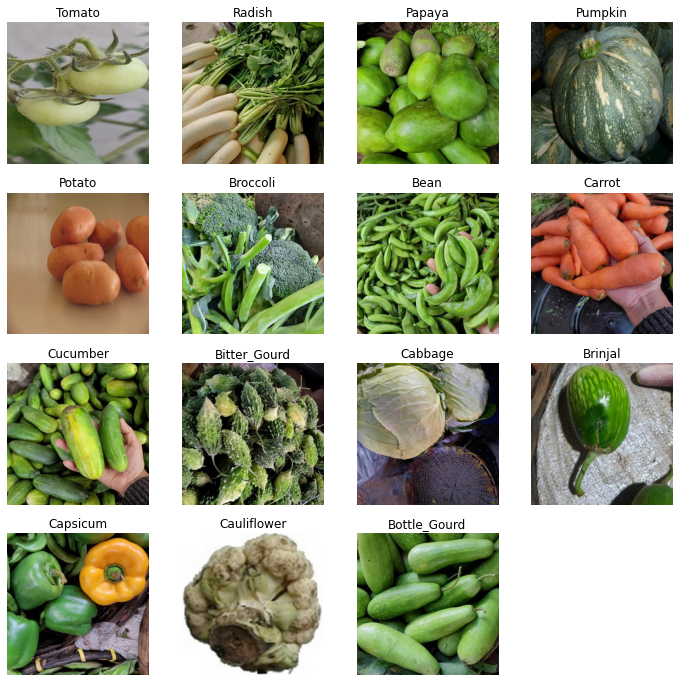

In [ ]:
 #Membuat Plot beberapa gambar
train_path = "../Vegetable/train"
validation_path = "../Vegetable/validation"
test_path = "../Vegetable/test"

image_categories = os.listdir('../Vegetable/train')

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)

In [ ]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 3005 images belonging to 15 classes.
Found 610 images belonging to 15 classes.
Found 600 images belonging to 15 classes.


In [ ]:
image_batch, label_batch = next(val_image_generator)
image_batch.shape, label_batch.shape

((32, 150, 150, 3), (32, 15))

In [ ]:
print (train_image_generator.class_indices)

labels = '\n'.join(sorted(train_image_generator.class_indices.keys()))

with open('vegetable.txt', 'w') as f:
  f.write(labels)

{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}


In [ ]:
!cat vegetable.txt

Bean
Bitter_Gourd
Bottle_Gourd
Brinjal
Broccoli
Cabbage
Capsicum
Carrot
Cauliflower
Cucumber
Papaya
Potato
Pumpkin
Radish
Tomato

In [ ]:
IMG_SHAPE = (224,224,3)

# Create the base model from the pre-trained MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
base_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(units=15, activation='softmax')
])

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
print(optimizer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 64)          737344    
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 15)                975       
                                                                 
Total params: 2,996,303
Trainable params: 738,319
Non-tr

In [ ]:
print('Number of trainable weights = {}'.format(len(model.trainable_weights)))

Number of trainable weights = 4


In [ ]:
history = model.fit_generator(train_image_generator, 
                    epochs=5, 
                    validation_data=val_image_generator)

Epoch 1/5
94/94 [==============================] - 1149s 12s/step - loss: 0.6158 - accuracy: 0.8536 - val_loss: 0.1585 - val_accuracy: 0.9508
Epoch 2/5
94/94 [==============================] - 10s 111ms/step - loss: 0.0609 - accuracy: 0.9794 - val_loss: 0.1197 - val_accuracy: 0.9689
Epoch 3/5
94/94 [==============================] - 10s 110ms/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.1690 - val_accuracy: 0.9607
Epoch 4/5
94/94 [==============================] - 11s 112ms/step - loss: 0.0461 - accuracy: 0.9860 - val_loss: 0.1174 - val_accuracy: 0.9656
Epoch 5/5
94/94 [==============================] - 11s 113ms/step - loss: 0.0409 - accuracy: 0.9894 - val_loss: 0.1793 - val_accuracy: 0.9443


In [ ]:
import os

MODEL_BASE_PATH = "/content/drive/MyDrive/BIGPROJECT2/Vegetable"
PROJECT_NAME = "klasifikasi sayuran"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/BIGPROJECT2/Vegetable/klasifikasi sayuran/model.h5...
